# Load Library:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Load Dataset:

In [7]:
df=pd.read_csv(r"F:\Data Analyst\Project\Analytis Engineer Project\data.csv")
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
df

,Date,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,...,Revenue,Order_Id,Day,Month,Year,Quarter,Day_Name,Month_Name,Weekend_Flag,Customer_Age_Group
0,2020-11-26,19.0,Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,...,950.0,0,26,11,2020,4,Thursday,November,0,Youth(<25)
1,2022-11-26,19.0,Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,...,950.0,1,26,11,2022,4,Saturday,November,1,Youth(<25)
2,2021-03-23,49.0,Male,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,...,2401.0,2,23,3,2021,1,Tuesday,March,0,Adults(35-64)
3,2022-03-23,49.0,Male,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,...,2088.0,3,23,3,2022,1,Wednesday,March,0,Adults(35-64)
4,2021-05-15,47.0,Female,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,...,418.0,4,15,5,2021,2,Saturday,May,1,Adults(35-64)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112002,2021-05-02,33.0,Female,Australia,New South Wales,Bikes,Touring Bikes,"Touring-3000 Yellow, 54",1,461,...,757.0,113013,2,5,2021,2,Sunday,May,0,Young Adults(25-34)
112003,2022-05-02,33.0,Female,Australia,New South Wales,Bikes,Touring Bikes,"Touring-3000 Yellow, 54",2,461,...,757.0,113014,2,5,2022,2,Monday,May,0,Young Adults(25-34)
112004,2022-12-30,39.0,Male,France,Seine (Paris),Clothing,Jerseys,"Long-Sleeve Logo Jersey, S",1,38,...,41.0,113018,30,12,2022,4,Friday,December,1,Adults(35-64)
112005,2020-12-07,27.0,Male,United Kingdom,England,Clothing,Jerseys,"Short-Sleeve Classic Jersey, S",7,42,...,363.0,113023,7,12,2020,4,Monday,December,0,Young Adults(25-34)


# Target Variable: Profit & Revenue

# q1. Total Revenue?

In [9]:
df['Revenue'].sum()

84791595.0

# Q2: Total Profit?

In [10]:
df['Profit'].sum()

32039276.0

# Q3: Profit Margin?

In [14]:
profit_margin=(df['Profit'].sum()/df['Revenue'].sum())*100
round(profit_margin,2)

37.79

# Q4:  Total Order?

In [16]:
df['Order_Id'].count()

112007

# Q5: Average Age?

In [17]:
df['Customer_Age'].median()

35.0

# Q6: Total Cost?
    

In [20]:
df['Cost'].sum()

52757192.0

# Seperate Categorical and Numerical Value

In [21]:
cat=df.select_dtypes(include='object')
num=df.select_dtypes(exclude='object')

In [22]:
cat.head()

,Date,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Day_Name,Month_Name,Customer_Age_Group
0,2020-11-26,Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,Thursday,November,Youth(<25)
1,2022-11-26,Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,Saturday,November,Youth(<25)
2,2021-03-23,Male,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,Tuesday,March,Adults(35-64)
3,2022-03-23,Male,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,Wednesday,March,Adults(35-64)
4,2021-05-15,Female,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,Saturday,May,Adults(35-64)


In [23]:
num.head()

,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Order_Id,Day,Month,Year,Quarter,Weekend_Flag
0,19.0,8,45,120,590.0,360.0,950.0,0,26,11,2020,4,0
1,19.0,8,45,120,590.0,360.0,950.0,1,26,11,2022,4,1
2,49.0,23,45,120,1366.0,1035.0,2401.0,2,23,3,2021,1,0
3,49.0,20,45,120,1188.0,900.0,2088.0,3,23,3,2022,1,0
4,47.0,4,45,120,238.0,180.0,418.0,4,15,5,2021,2,1


# Univariate Analysis categorical Columns

In [48]:
def chart(feature):
    plt.figure(figsize=(12,6))
    ax=sns.countplot(data=df,x=df[feature])
    plt.title(feature)
    for i in ax.containers:
        ax.bar_label(i,)

Customer_Gender Columns

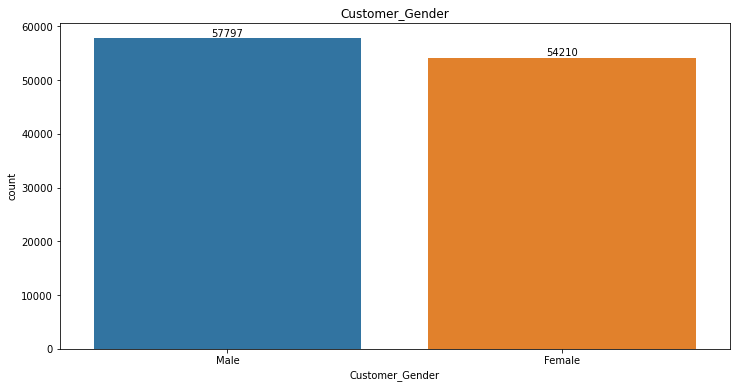

In [34]:
chart('Customer_Gender')

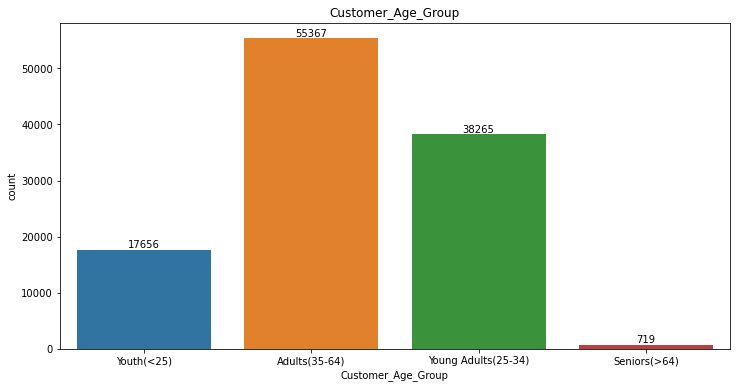

In [35]:
chart('Customer_Age_Group')

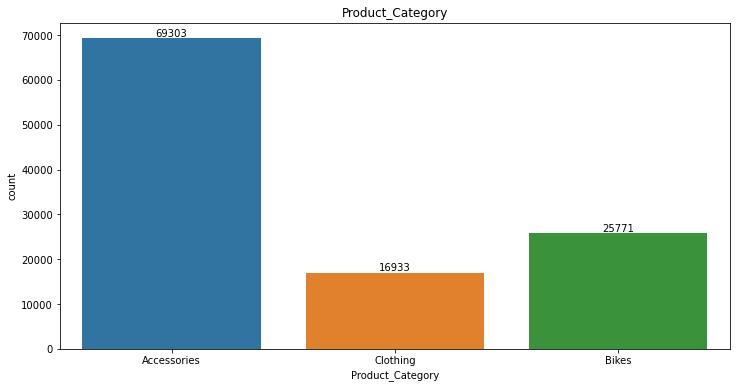

In [39]:
chart('Product_Category')

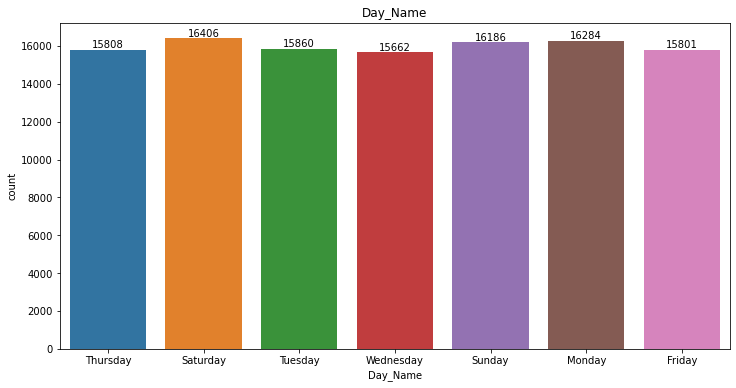

In [49]:
chart('Day_Name')

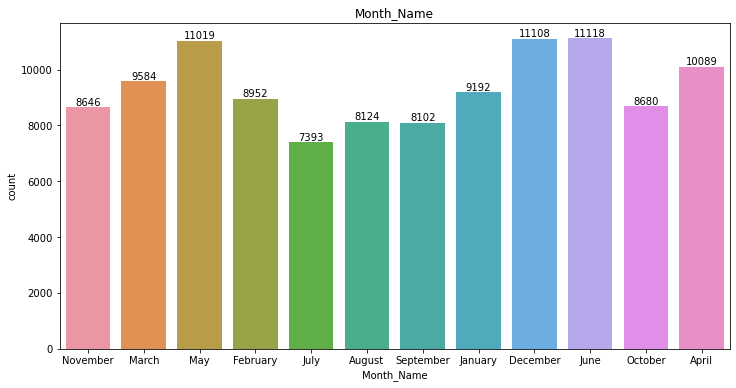

In [50]:
chart('Month_Name')

Top 10 Product

In [67]:
top=df['Product'].value_counts()
top[:10]

Water Bottle - 30 oz.      10652
Patch Kit/8 Patches        10256
Mountain Tire Tube          6688
AWC Logo Cap                4358
Sport-100 Helmet, Red       4218
Sport-100 Helmet, Black     4148
Road Tire Tube              4106
Fender Set - Mountain       4015
Sport-100 Helmet, Blue      3786
Touring Tire Tube           3634
Name: Product, dtype: int64

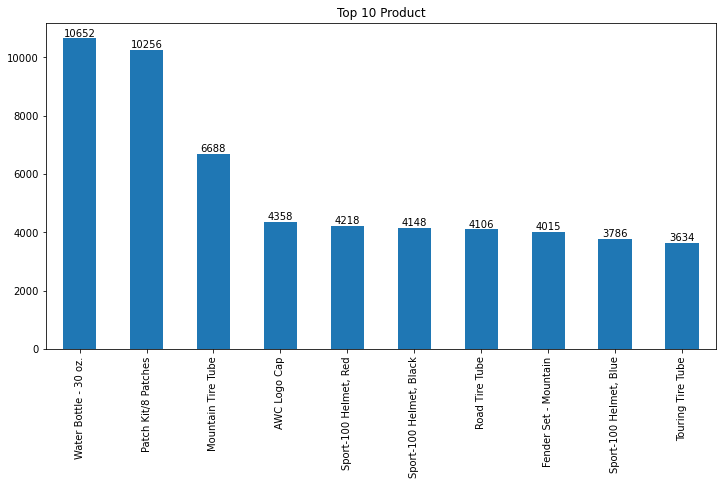

In [69]:
plt.figure(figsize=(12,6))
ax=top[:10].plot(kind='bar')
plt.title('Top 10 Product')
for i in ax.containers:
    ax.bar_label(i,)

# Top 10 State

In [70]:
top=df['State'].value_counts()
top[:10]

California             22218
British Columbia       13965
England                13469
Washington             11168
New South Wales        10318
Victoria                5972
Oregon                  5232
Queensland              5176
Saarland                2754
Nordrhein-Westfalen     2473
Name: State, dtype: int64

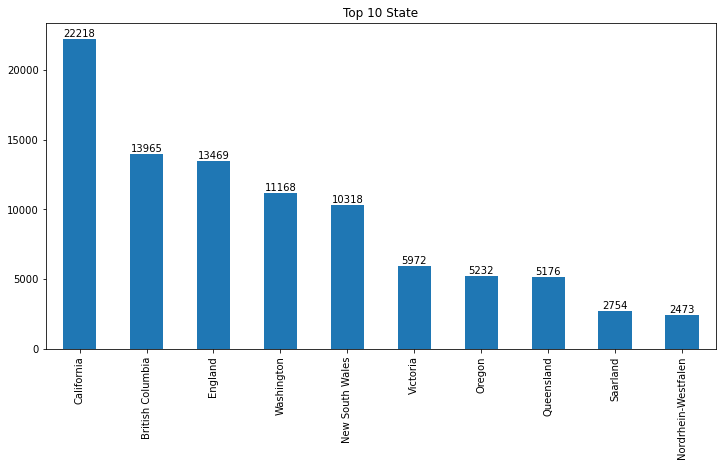

In [162]:
plt.figure(figsize=(12,6))
ax=top[:10].plot(kind='bar')
plt.title('Top 10 State')
for i in ax.containers:
    ax.bar_label(i,)

# Numerical Columns Univariate analysis

In [85]:
def num(feature):
    plt.figure(figsize=(12,6))
    sns.histplot(x=df[feature],kde=True)
    plt.title(feature);

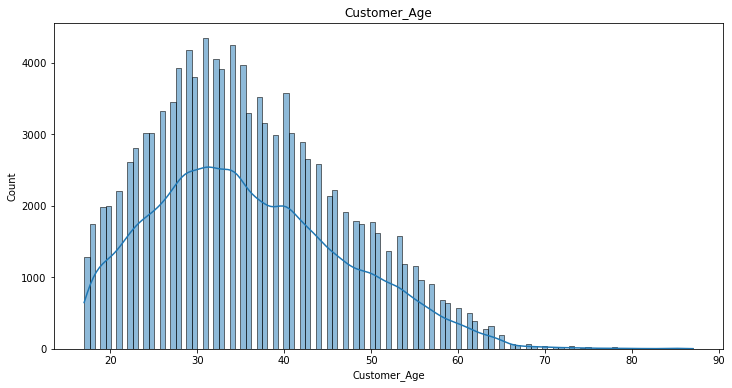

In [86]:
num('Customer_Age')

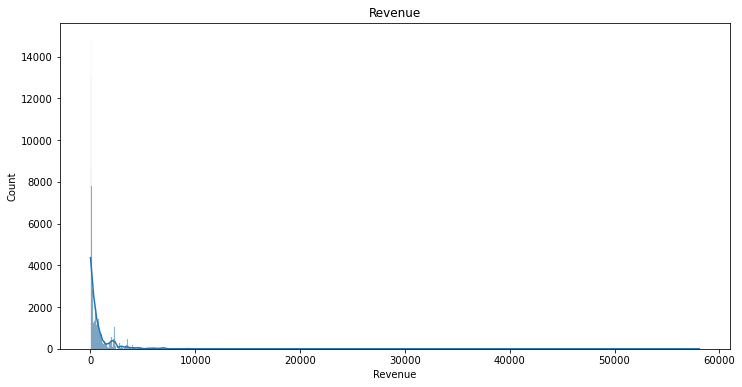

In [87]:
num('Revenue')

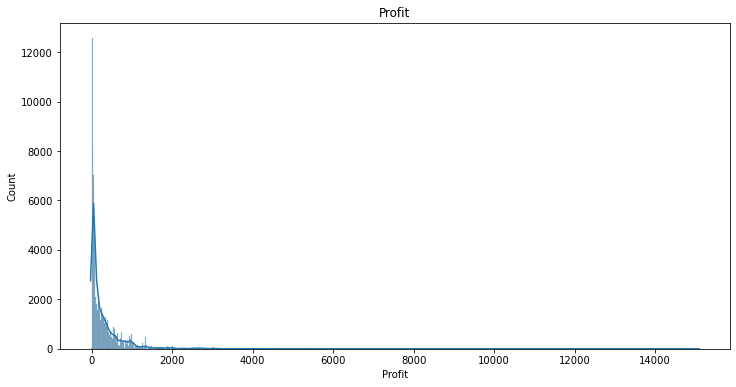

In [88]:
num('Profit')

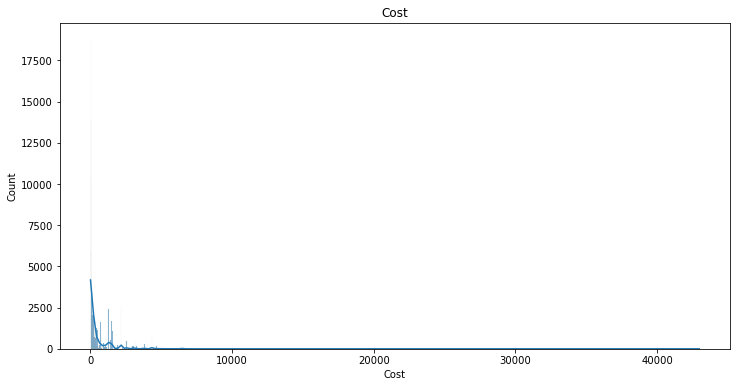

In [89]:
num('Cost')

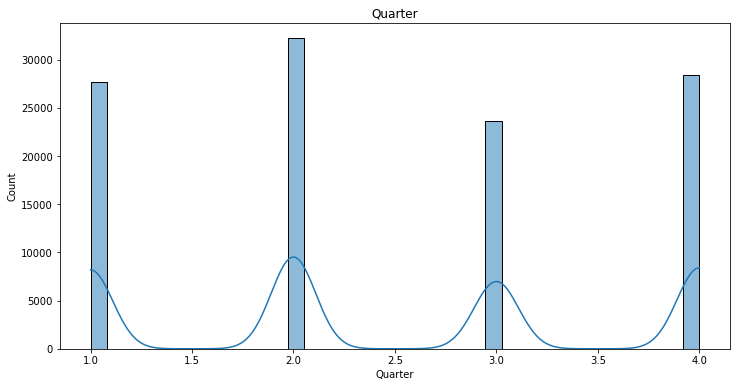

In [90]:
num('Quarter')

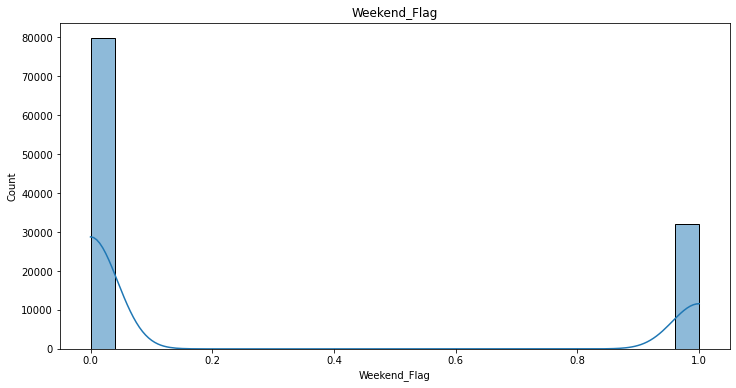

In [91]:
num('Weekend_Flag')

# Bivariate Analysis

Revenue by Customer Age

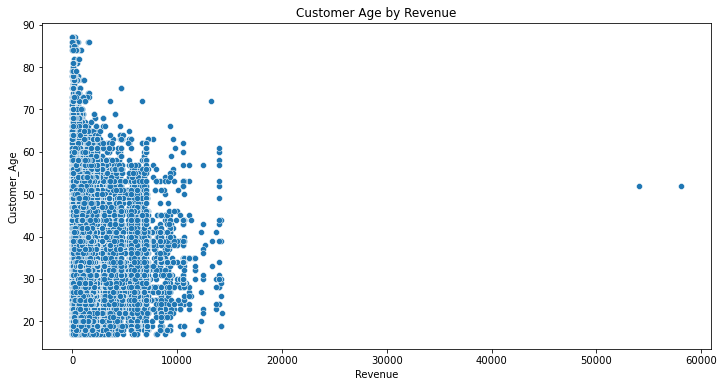

In [97]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x=df['Revenue'],y=df['Customer_Age'])
plt.title('Customer Age by Revenue',fontsize=12);

# Profit by Customer Age

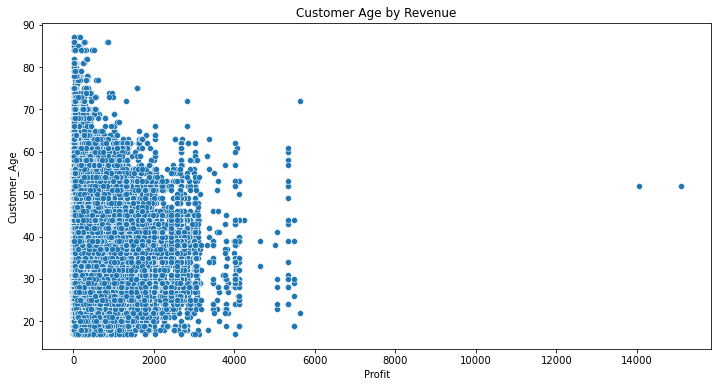

In [98]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x=df['Profit'],y=df['Customer_Age'])
plt.title('Customer Age by Revenue',fontsize=12);

# Revenue and Profit Distribution

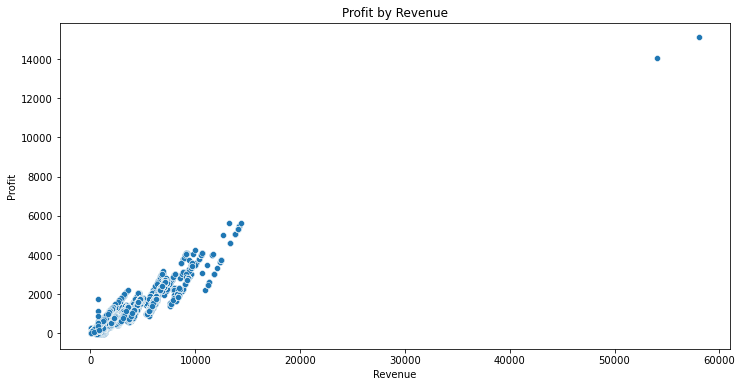

In [99]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x=df['Revenue'],y=df['Profit'])
plt.title('Profit by Revenue',fontsize=12);

Revenue and Profit By Year

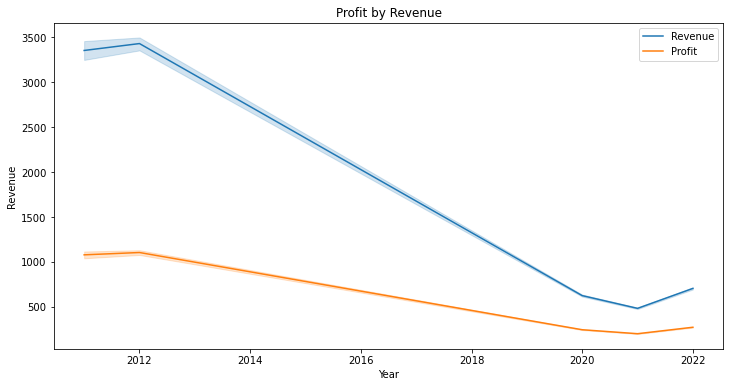

In [102]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df,x=df['Year'],y=df['Revenue'],label='Revenue')
sns.lineplot(data=df,x=df['Year'],y=df['Profit'],label='Profit')
plt.title('Profit by Revenue',fontsize=12);

Month By Revenue

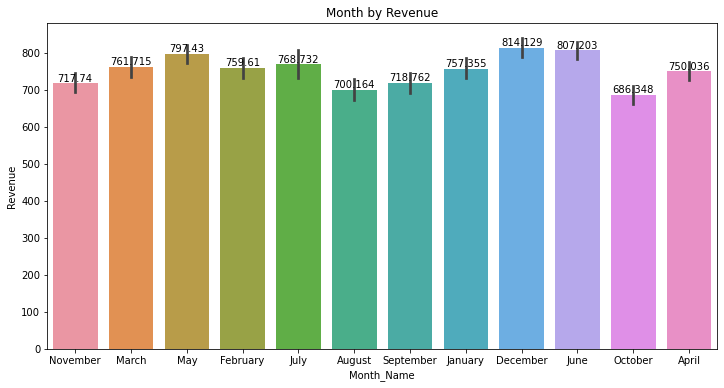

In [107]:
plt.figure(figsize=(12,6))
ax=sns.barplot(data=df,x=df['Month_Name'],y=df['Revenue'],label='Revenue')
plt.title('Month by Revenue',fontsize=12)
for i in ax.containers:
    ax.bar_label(i,);

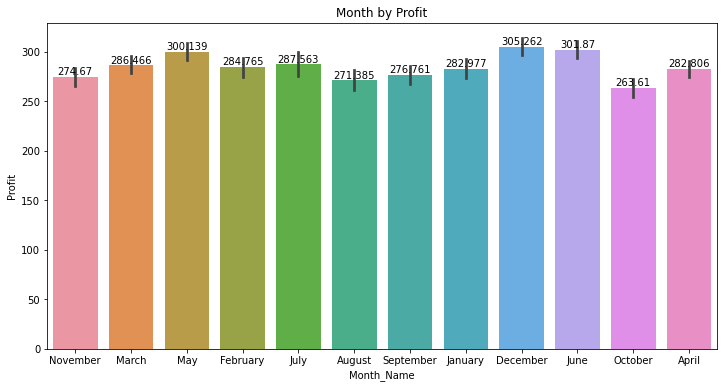

In [109]:
plt.figure(figsize=(12,6))
ax=sns.barplot(data=df,x=df['Month_Name'],y=df['Profit'],label='Profit')
plt.title('Month by Profit',fontsize=12)
for i in ax.containers:
    ax.bar_label(i,);

# Day By Revenue

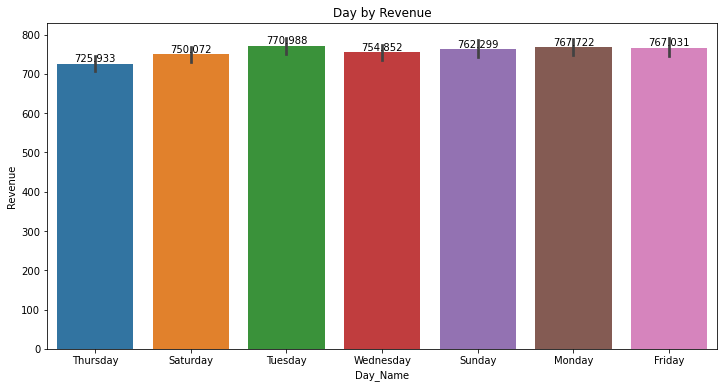

In [108]:
plt.figure(figsize=(12,6))
ax=sns.barplot(data=df,x=df['Day_Name'],y=df['Revenue'])
plt.title('Day by Revenue',fontsize=12)
for i in ax.containers:
    ax.bar_label(i,);

# Day By Profit

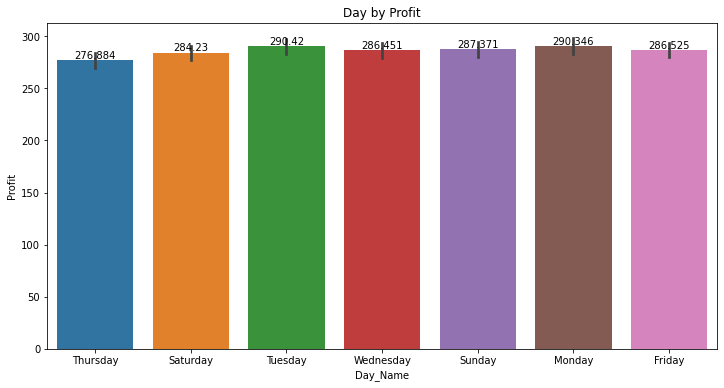

In [110]:
plt.figure(figsize=(12,6))
ax=sns.barplot(data=df,x=df['Day_Name'],y=df['Profit'])
plt.title('Day by Profit',fontsize=12)
for i in ax.containers:
    ax.bar_label(i,);

# Country by Revenue

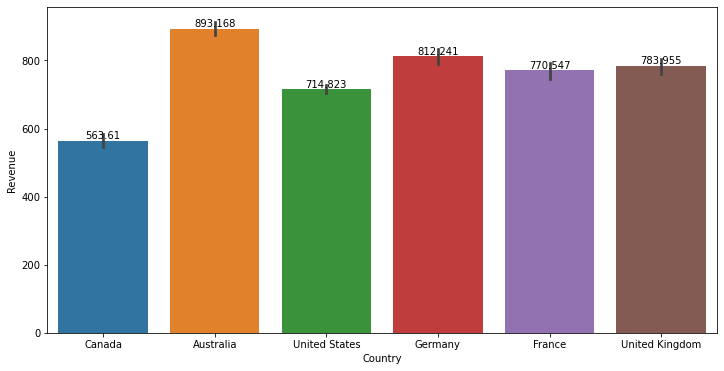

In [125]:
plt.figure(figsize=(12,6))
ax=sns.barplot(data=df,x=df['Country'],y=df['Revenue'])
plt.title('Country by Revenue',fontsize=12)
for i in ax.containers:
    ax.bar_label(i,);

# Country by Profit

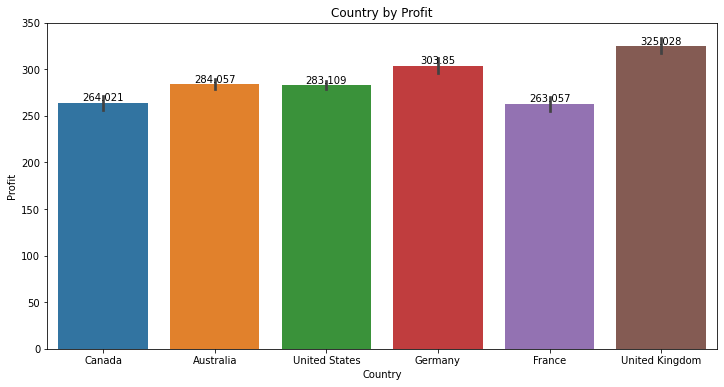

In [127]:
plt.figure(figsize=(12,6))
ax=sns.barplot(data=df,x=df['Country'],y=df['Profit'])
plt.title('Country by Profit',fontsize=12)
for i in ax.containers:
    ax.bar_label(i,);

# Product_Category by Revenue

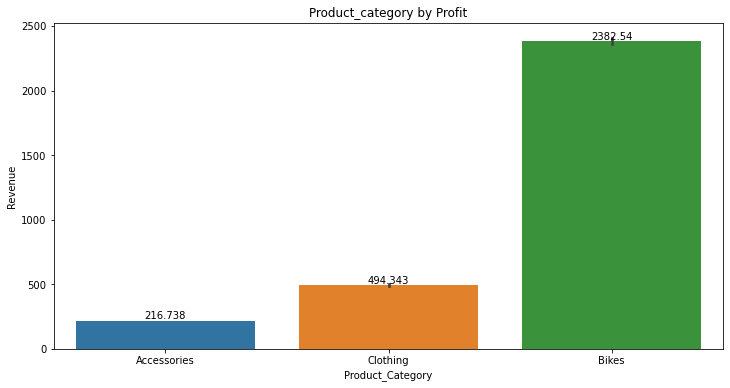

In [130]:
plt.figure(figsize=(12,6))
ax=sns.barplot(data=df,x=df['Product_Category'],y=df['Revenue'])
plt.title('Product_category by Profit',fontsize=12)
for i in ax.containers:
    ax.bar_label(i,);

# Product_Category by Profit

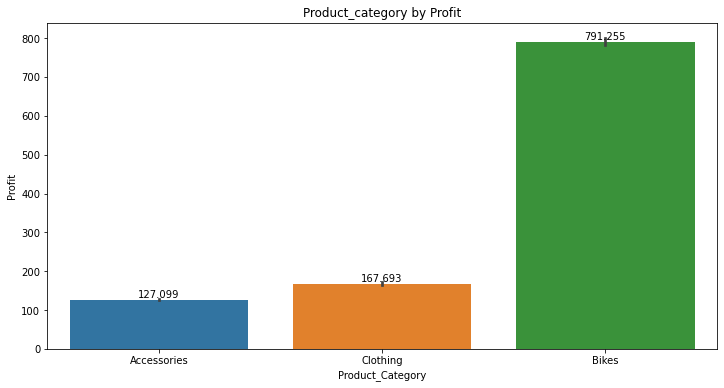

In [129]:
plt.figure(figsize=(12,6))
ax=sns.barplot(data=df,x=df['Product_Category'],y=df['Profit'])
plt.title('Product_category by Profit',fontsize=12)
for i in ax.containers:
    ax.bar_label(i,);

# Cost By Revenue

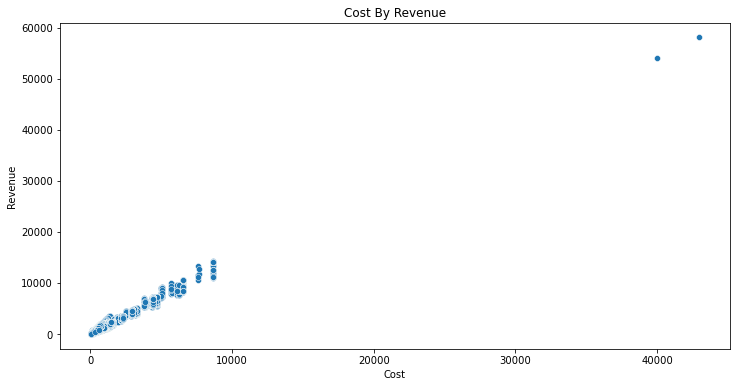

In [132]:
plt.figure(figsize=(12,6))
ax=sns.scatterplot(data=df,x=df['Cost'],y=df['Revenue'])
plt.title('Cost By Revenue',fontsize=12);

# Cost By Profit

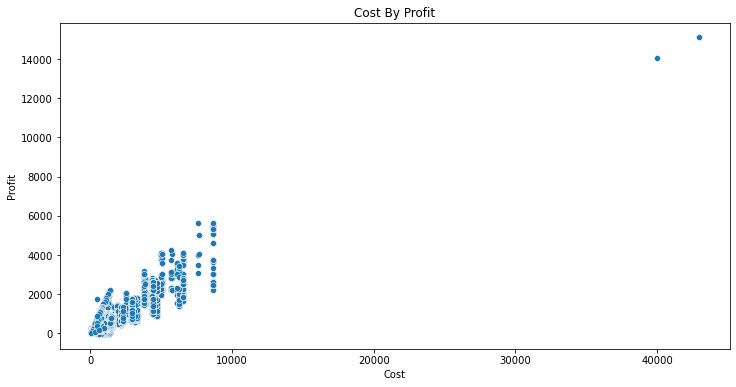

In [133]:
plt.figure(figsize=(12,6))
ax=sns.scatterplot(data=df,x=df['Cost'],y=df['Profit'])
plt.title('Cost By Profit',fontsize=12);

# Customer Age Group by Revenue

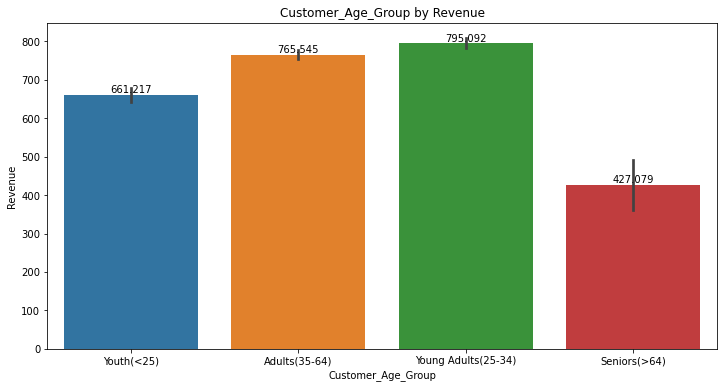

In [134]:
plt.figure(figsize=(12,6))
ax=sns.barplot(data=df,x=df['Customer_Age_Group'],y=df['Revenue'])
plt.title('Customer_Age_Group by Revenue',fontsize=12)
for i in ax.containers:
    ax.bar_label(i,);

# Customer_Age_Group by Profit

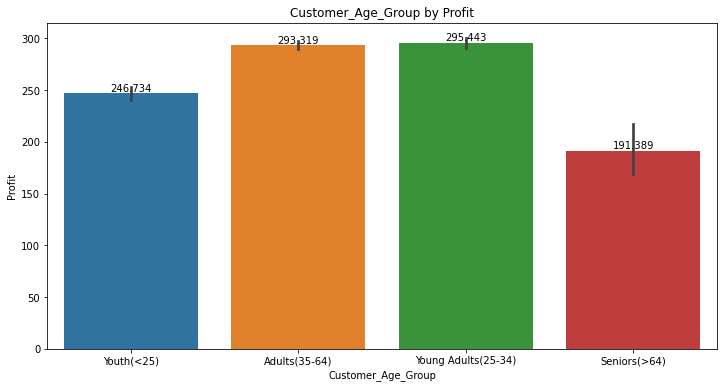

In [135]:
plt.figure(figsize=(12,6))
ax=sns.barplot(data=df,x=df['Customer_Age_Group'],y=df['Profit'])
plt.title('Customer_Age_Group by Profit',fontsize=12)
for i in ax.containers:
    ax.bar_label(i,);

# Customer_Gender by Revenue

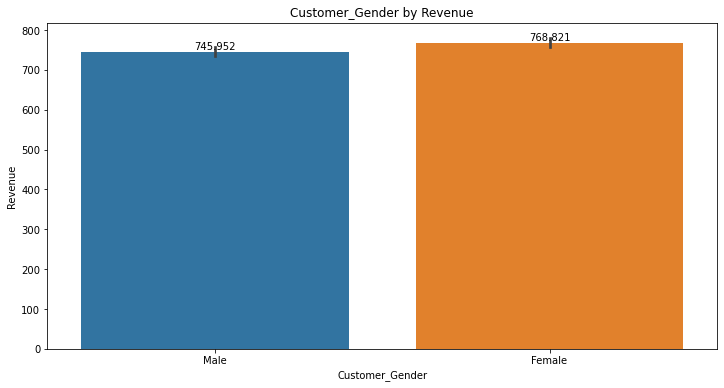

In [136]:
plt.figure(figsize=(12,6))
ax=sns.barplot(data=df,x=df['Customer_Gender'],y=df['Revenue'])
plt.title('Customer_Gender by Revenue',fontsize=12)
for i in ax.containers:
    ax.bar_label(i,);

# Customer_Gender by Profit

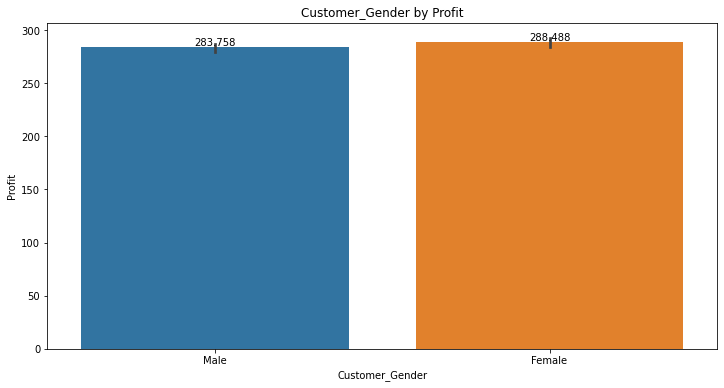

In [137]:
plt.figure(figsize=(12,6))
ax=sns.barplot(data=df,x=df['Customer_Gender'],y=df['Profit'])
plt.title('Customer_Gender by Profit',fontsize=12)
for i in ax.containers:
    ax.bar_label(i,);

# Order Quantity By Profit

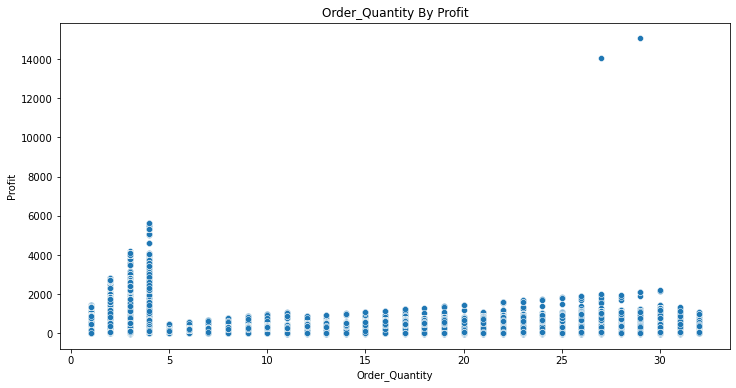

In [138]:
plt.figure(figsize=(12,6))
ax=sns.scatterplot(data=df,x=df['Order_Quantity'],y=df['Profit'])
plt.title('Order_Quantity By Profit',fontsize=12);

# Order_Quantity By Revenue

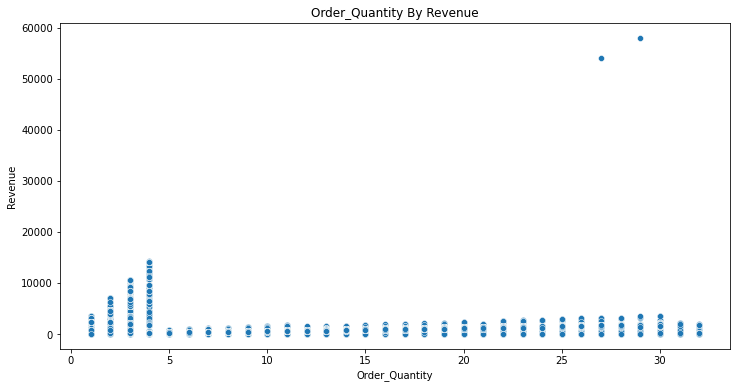

In [139]:
plt.figure(figsize=(12,6))
ax=sns.scatterplot(data=df,x=df['Order_Quantity'],y=df['Revenue'])
plt.title('Order_Quantity By Revenue',fontsize=12);

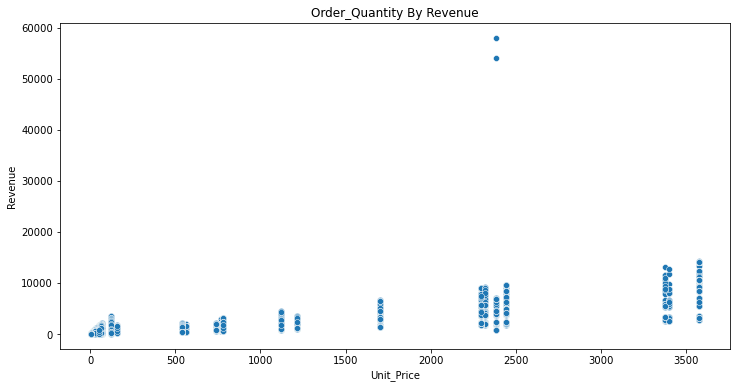

In [141]:
plt.figure(figsize=(12,6))
ax=sns.scatterplot(data=df,x=df['Unit_Price'],y=df['Revenue'])
plt.title('Order_Quantity By Revenue',fontsize=12);

# %Gender by Country

In [144]:
pd.crosstab(df.Customer_Gender,df.Country)

Country,Australia,Canada,France,Germany,United Kingdom,United States
Customer_Gender,,,,,,
Female,11403,6429,5463,5532,6639,18744
Male,12335,7597,5457,5494,6830,20084


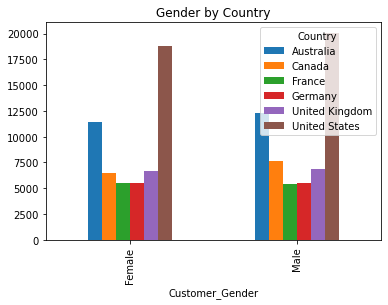

In [151]:
pd.crosstab(df.Customer_Gender,df.Country).plot(kind='bar')
plt.title('Gender by Country');

# %Gender by Product_Category

In [147]:
pd.crosstab(df.Customer_Gender,df.Product_Category)

Product_Category,Accessories,Bikes,Clothing
Customer_Gender,,,
Female,33434,12751,8025
Male,35869,13020,8908


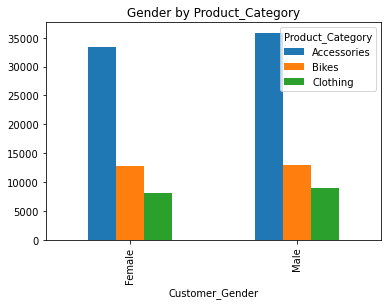

In [150]:
pd.crosstab(df.Customer_Gender,df.Product_Category).plot(kind='bar')
plt.title('Gender by Product_Category');

# Weekend Flag by product_category

In [153]:
pd.crosstab(df.Weekend_Flag,df.Product_Category)

Product_Category,Accessories,Bikes,Clothing
Weekend_Flag,,,
0,49346,18419,12035
1,19957,7352,4898


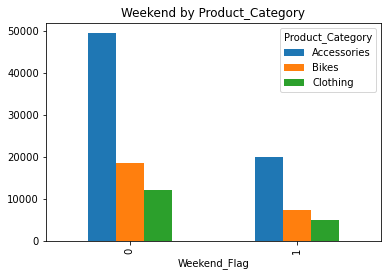

In [155]:
pd.crosstab(df.Weekend_Flag,df.Product_Category).plot(kind='bar')
plt.title('Weekend by Product_Category');

In [157]:
pd.crosstab(df.Product_Category,df.Month_Name)

Month_Name,April,August,December,February,January,July,June,March,May,November,October,September
Product_Category,,,,,,,,,,,,
Accessories,6173,5298,6675,5463,5693,4746,6431,5885,6621,5526,5618,5174
Bikes,2445,1542,2757,2189,2105,1523,2965,2308,2924,1766,1686,1561
Clothing,1471,1284,1676,1300,1394,1124,1722,1391,1474,1354,1376,1367


# Month_name by Product_category

<AxesSubplot:xlabel='Month_Name'>

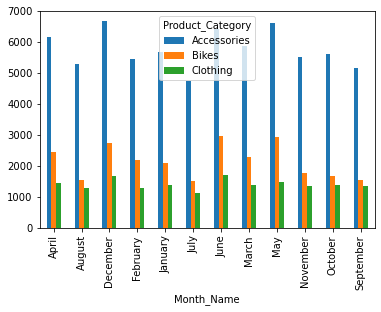

In [159]:
pd.crosstab(df.Month_Name,df.Product_Category).plot(kind='bar')
plt.title('Month_name by Product_category');

# Year by Product_category

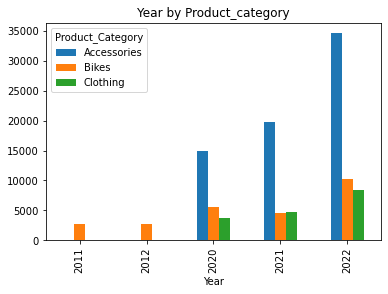

In [161]:
pd.crosstab(df.Year,df.Product_Category).plot(kind='bar')
plt.title('Year by Product_category');

# Country by Customer Age Group

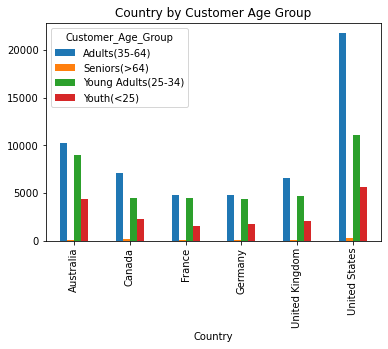

In [186]:
pd.crosstab(df.Country,df.Customer_Age_Group).plot(kind='bar')
plt.title('Country by Customer Age Group');

# Top 5 State by Revenue

In [183]:
grp=df.groupby('State')['Revenue'].sum()
grp.sort_values(ascending=False)[:5]

State
California          17528124.0
England             10559094.0
New South Wales      9133512.0
British Columbia     7848778.0
Washington           6701258.0
Name: Revenue, dtype: float64

<AxesSubplot:xlabel='State'>

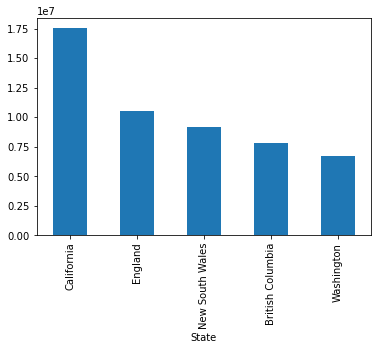

In [184]:
grp.sort_values(ascending=False)[:5].plot(kind='bar')

# Pivot Table

In [173]:
pivot=pd.pivot_table(data=df,index=['Country','Product_Category'],columns='Year',values=['Revenue','Profit'],aggfunc=np.sum,fill_value=0)
pivot

Profit                                     \
Year                                2011     2012     2020    2021     2022   
Country        Product_Category                                               
Australia      Accessories             0        0   341937  422896   742793   
               Bikes              710091   712711   875845  465731  2050637   
               Clothing                0        0   112106  100499   207705   
Canada         Accessories             0        0   326557  385099   694983   
               Bikes              302594   317014   238514  189056   641386   
               Clothing                0        0   148234  160321   299396   
France         Accessories             0        0   168778  225178   379738   
               Bikes              277373   279851   292126  249486   809725   
               Clothing                0        0    51052   46094    93176   
Germany        Accessories             0        0   181675  275840   443374   
               Bikes              270488   271280   338167  355136  1048316   
               Clothing                0        0    32404   51806    81760   
United Kingdom Accessories             0        0   245127  332952   560461   
               Bikes              303817   308917   472418  450867  1408017   
               Clothing                0        0    64540   85841   144849   
United States  Accessories             0        0   708779  858310  1513832   
               Bikes             1011071  1046746  1039201  851112  2803735   
               Clothing                0        0   275295  312506   571955   

                                 Revenue                                      
Year                                2011     2012     2020     2021     2022  
Country        Product_Category                                               
Australia      Accessories             0        0   617684   764598  1343889  
               Bikes             2527984  2545407  3027618  1642208  7130834  
               Clothing                0        0   433109   377529   791164  
Canada         Accessories             0        0   526105   619645  1118593  
               Bikes              787379   827590   588767   470818  1588508  
               Clothing                0        0   324063   374172   679560  
France         Accessories             0        0   300560   401157   675343  
               Bikes              946624   962153   956216   809755  2641833  
               Clothing                0        0   168327   198160   354248  
Germany        Accessories             0        0   309187   470989   757341  
               Bikes              833603   835188  1011244  1026895  3074326  
               Clothing                0        0   124743   198664   313589  
United Kingdom Accessories             0        0   400835   545116   917027  
               Bikes              823481   834885  1246242  1175022  3699166  
               Clothing                0        0   204095   262642   450583  
United States  Accessories             0        0  1206806  1465151  2580552  
               Bikes             3026153  3120868  2927498  2399652  7912396  
               Clothing                0        0   743014   836449  1536593

In [185]:
df.head(2)

,Date,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,...,Revenue,Order_Id,Day,Month,Year,Quarter,Day_Name,Month_Name,Weekend_Flag,Customer_Age_Group
0,2020-11-26,19.0,Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,...,950.0,0,26,11,2020,4,Thursday,November,0,Youth(<25)
1,2022-11-26,19.0,Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,...,950.0,1,26,11,2022,4,Saturday,November,1,Youth(<25)


TypeError: missing a required argument: 'height'

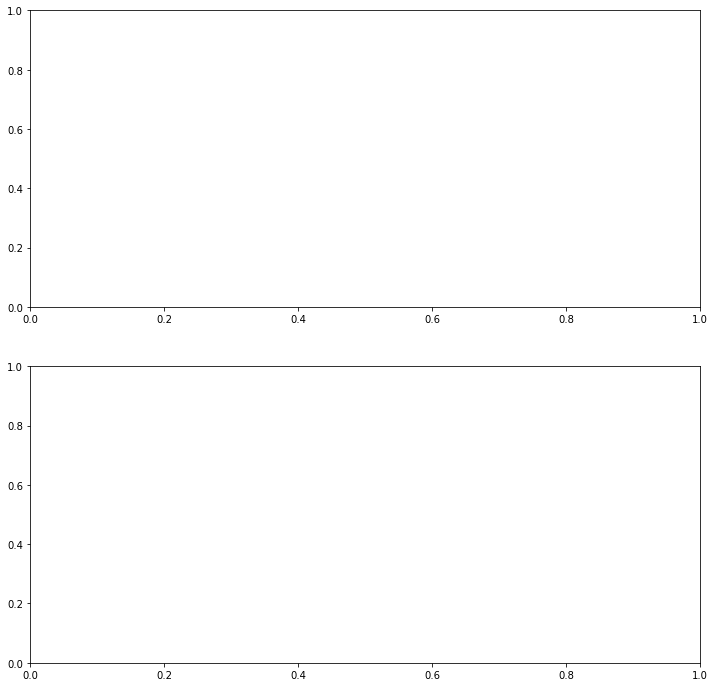

In [187]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Plot the first subplot
axs[0].bar(data=df, x=df['Country'], y=df['Revenue'])
axs[0].set_title('Country by Revenue', fontsize=12)

# Plot the second subplot
axs[1].bar(data=df, x=df['Country'], y=df['Profit'])
axs[1].set_title('Country by Profit', fontsize=12)


# Add labels to the bars
for ax in axs:
    for container in ax.containers:
        ax.bar_label(container)


# Adjust spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()


In [ ]:
f,ax=plt.subplots(1,2, figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

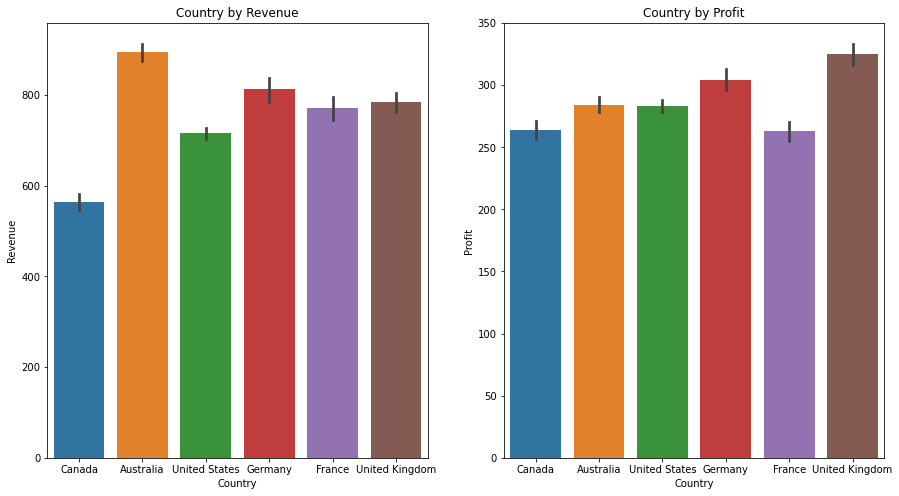

In [195]:
f,ax=plt.subplots(1,2,figsize=(15,8))
axs=sns.barplot(data=df,x=df['Country'],y=df['Revenue'],ax=ax[0])
ax[0].set_title('Country by Revenue')

axs=sns.barplot(data=df,x=df['Country'],y=df['Profit'],ax=ax[1])
ax[1].set_title('Country by Profit');

# Correlation

In [198]:
corr=df.corr()
corr

,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Order_Id,Day,Month,Year,Quarter,Weekend_Flag
Customer_Age,1.000000,0.027268,-0.021322,-0.020231,0.004400,-0.015936,-0.009247,-0.013074,-0.015106,-0.051451,0.038143,-0.054059,-0.010146
Order_Quantity,0.027268,1.000000,-0.516291,-0.516396,-0.238809,-0.340357,-0.312870,-0.099677,-0.002747,0.027484,0.217167,0.030036,0.004998
Unit_Cost,-0.021322,-0.516291,1.000000,0.997892,0.740612,0.829489,0.817482,0.149619,0.003453,-0.021178,-0.348631,-0.025992,-0.001784
Unit_Price,-0.020231,-0.516396,0.997892,1.000000,0.749440,0.825911,0.818125,0.140767,0.003521,-0.021208,-0.341391,-0.026063,-0.001892
Profit,0.004400,-0.238809,0.740612,0.749440,1.000000,0.902053,0.956429,0.072993,0.004689,-0.002019,-0.356462,-0.005382,-0.000966
Cost,-0.015936,-0.340357,0.829489,0.825911,0.902053,1.000000,0.988749,0.101027,0.003449,-0.006682,-0.417632,-0.009793,0.001463
Revenue,-0.009247,-0.312870,0.817482,0.818125,0.956429,0.988749,1.000000,0.093580,0.003962,-0.005204,-0.405916,-0.008477,0.000664
Order_Id,-0.013074,-0.099677,0.149619,0.140767,0.072993,0.101027,0.093580,1.000000,0.007204,0.008649,-0.037262,0.012265,0.000607
Day,-0.015106,-0.002747,0.003453,0.003521,0.004689,0.003449,0.003962,0.007204,1.000000,0.014693,-0.006574,0.018144,-0.005697
Month,-0.051451,0.027484,-0.021178,-0.021208,-0.002019,-0.006682,-0.005204,0.008649,0.014693,1.000000,-0.112873,0.971932,-0.003455


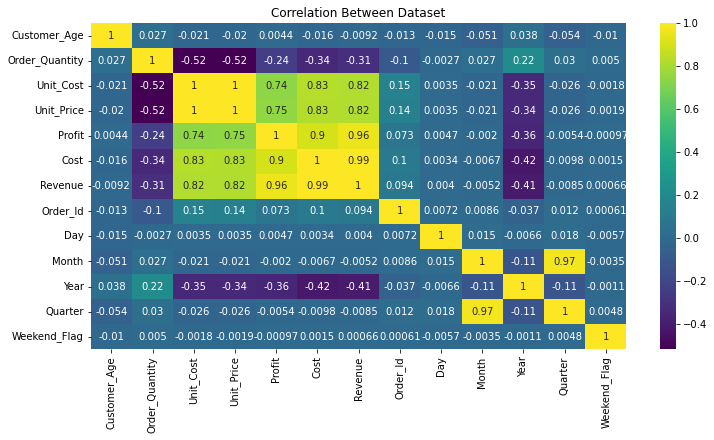

In [202]:
plt.figure(figsize=(12,6))
sns.heatmap(corr,cmap='viridis',annot=True)
plt.title('Correlation Between Dataset');

# Multivariate Analysis

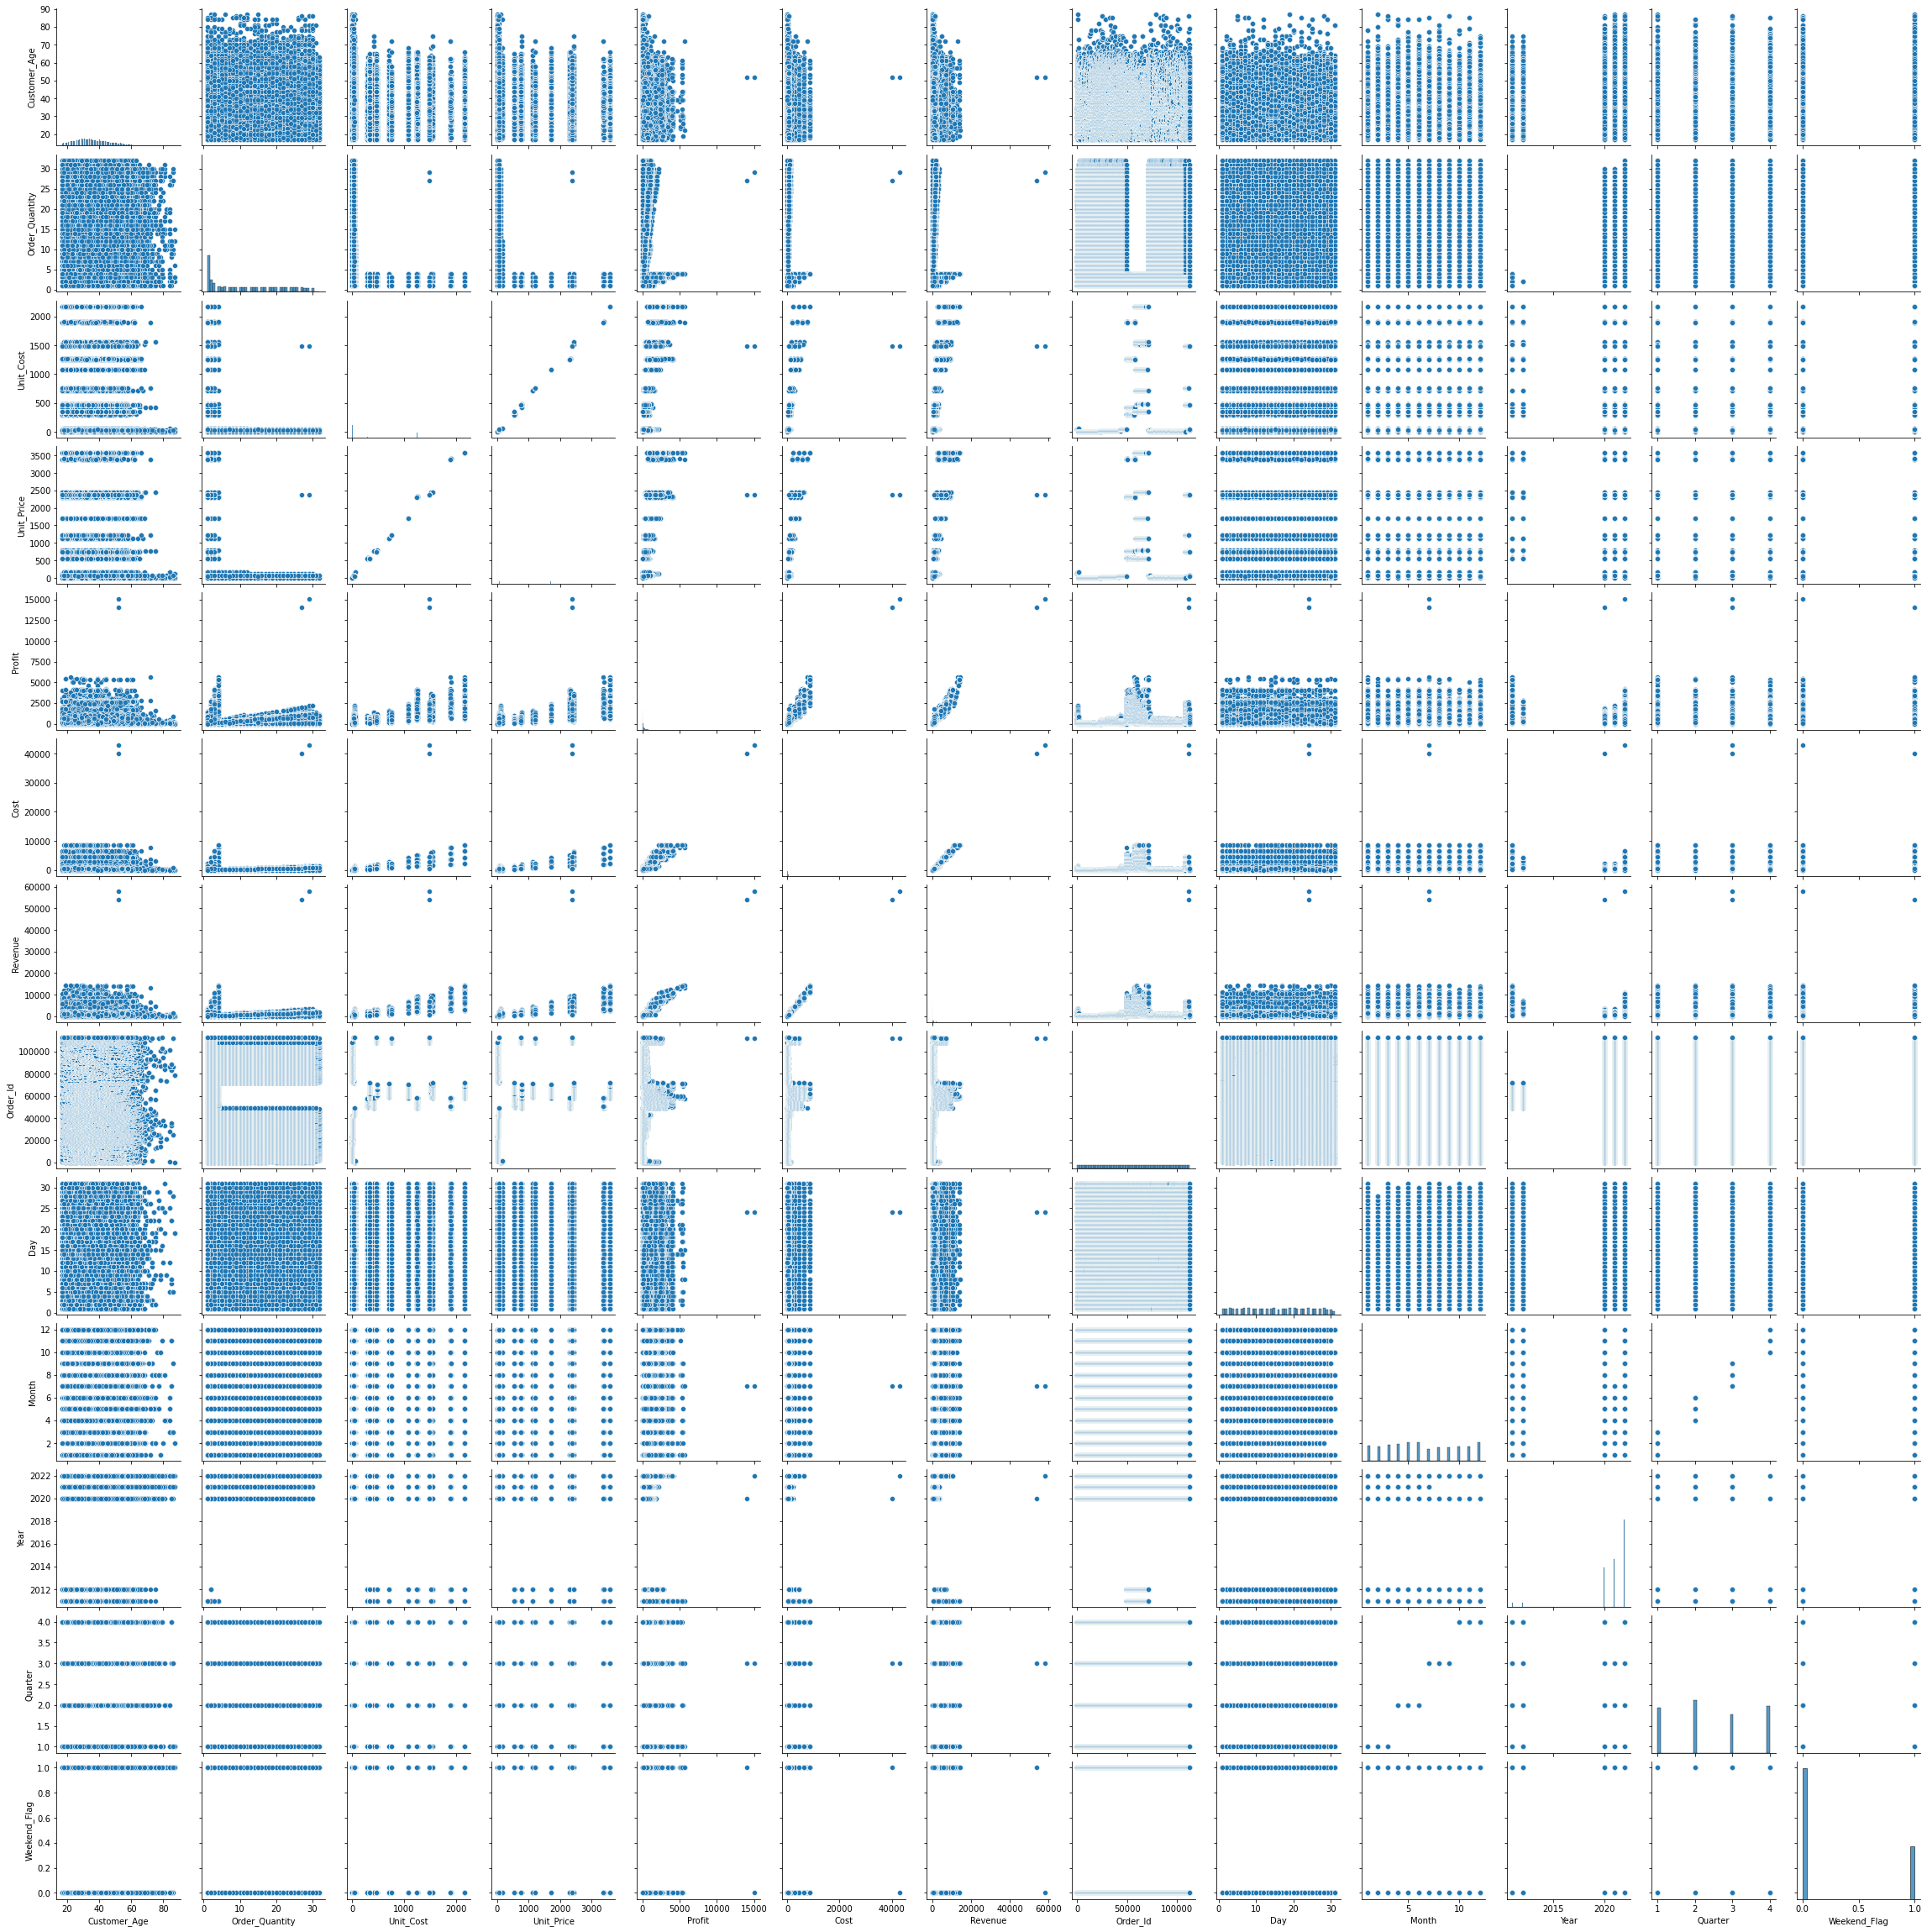

In [196]:
sns.pairplot(df)